## Main Notebook Aim

The aim of this notebook is to delineate differences in protein inference between AlphaDIA, Spectronaut and DIANN. Heuristic and Strict Parsimony grouping of either of these engines shall be evaluated on a HeLa QC dataset (Orbitrap Astral). Aims are the following:

- Explain apparent differences in protein inference between AlphaDIA - DIANN: Strict Parsimony
- Explain apparent differences in protein inference between AlphaDIA - Spectronaut: Strict Parsimony
- Explain apparent differences in protein inference between AlphaDIA - DIANN: Highly Heuristic
- Explain apparent differences in protein inference between AlphaDIA - Spectronaut: Highly Heuristic

Special focus lies on edge cases (subsumable, circular, non-deterministic) grouping situations.

Algorithmically, this is a challenging task since the different search engines operate with different, closed source codebases. Instead, opt for a post-hoc approach:

1. From each search engine, obtain a peptide and protein-group level output file for the same rawfiles processed with the same fasta/spectral library
2. Parse outputs such that each precursor is associated with its genes, with fanned out rows for peptides associating with more than one gene
3. Iterate over each gene in each result table and select those with exactly identical precursor sets. Mark these genes as "shared", with the definition: "A shared gene is a gene whose associated precursors are the same from each search engine"
4. Then, select groups that consist only of shared genes. While the gene-precursor association is clearly determined by the fasta, the manner in which genes are combined into groups may differ between search engines. Using these cases, we can examine how different search engines handle grouping starting from exactly the same precursors.

In [ ]:
# Inspect QC files and generate an overview of the data

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# Utility functions
# to be sure and to enable parsing without user input, infer cohort from file itself
def infer_engine(
    headers: list,
    alphadia_pe_columns: list = [
        "base_width_mobility",
        "base_width_rt",
        "mono_ms1_intensity",
    ],
    alphadia_pg_columns: list = ["pg"],
    diann_pe_columns: list = ["File.Name", "Run", "Protein.Group", "Protein.Ids"],
    diann_pg_columns: list = ["First.Protein.Description"],
    spectronaut_pe_columns: list = [
        "PG.ProteinGroups",
        "PG.ProteinAccessions",
        "PG.Genes",
        "PG.UniProtIds",
    ],
    spectronaut_pg_columns: list = [
        "PG.NrOfStrippedSequencesIdentified (Experiment-wide)",
        "PG.NrOfPrecursorsIdentified (Experiment-wide)",
    ],
):
    engine = []
    level = []
    if set(alphadia_pe_columns).issubset(headers):
        engine.append("Alphadia")
        level.append("peptide")
    elif set(alphadia_pg_columns).issubset(headers):
        engine.append("Alphadia")
        level.append("protein_group")
    elif set(diann_pe_columns).issubset(headers):
        engine.append("DiaNN")
        level.append("peptide")
    elif set(diann_pg_columns).issubset(headers):
        engine.append("DiaNN")
        level.append("protein_group")
    elif set(spectronaut_pe_columns).issubset(headers):
        engine.append("Spectronaut")
        level.append("peptide")
    elif set(spectronaut_pg_columns).issubset(headers):
        engine.append("Spectronaut")
        level.append("protein_group")
    else:
        raise ValueError("Could not infer search engine from column names")

    if len(engine) > 1:
        raise ValueError("More than one search engine detected")

    return engine[0], level[0]


# parse result files to usable format


def parse_alphadia_pe_table(
    pe_table: pd.DataFrame,
):
    return pe_table


def parse_alphadia_pg_table(
    pg_table: pd.DataFrame,
):
    return pg_table


def parse_diann_pe_table(
    pe_table: pd.DataFrame,
):
    return pe_table


def parse_diann_pg_table(
    pg_table: pd.DataFrame,
):
    return pg_table


def parse_spectronaut_pe_table(
    pe_table: pd.DataFrame,
):
    return pe_table


def parse_spectronaut_pg_table(
    pg_table: pd.DataFrame,
):
    return pg_table


# Higher level wrapper to read and parse peptide and protein group level results table


def read_and_parse_peptide_table(
    input_table_path: str,
    input_table_filename: str,
) -> pd.DataFrame:
    """Read and parse results table from respective search engine output. First step in analysing QC data.

    Parameters:
    ----------

    input_table_path : str
        Path to the peptide level results table

    input_table_filename : str
        Filename of the peptide level results table

    Returns:
    -------

    out_table : pd.DataFrame
        DataFrame containing the peptide level results

    """

    # read peptide level table
    input_table = pd.read_csv(
        os.path.join(input_table_path, input_table_filename), sep="\t"
    )

    engine, level = infer_engine(input_table.columns.tolist())

    if level == "peptide":
        if engine == "Alphadia":
            out_table = parse_alphadia_pe_table(input_table)
        elif engine == "DiaNN":
            out_table = parse_diann_pe_table(input_table)
        elif engine == "Spectronaut":
            out_table = parse_spectronaut_pe_table(input_table)
    elif level == "protein_group":
        if engine == "Alphadia":
            out_table = parse_alphadia_pg_table(input_table)
        elif engine == "DiaNN":
            out_table = parse_diann_pg_table(input_table)
        elif engine == "Spectronaut":
            out_table = parse_spectronaut_pg_table(input_table)

    return out_table, engine

In [ ]:
# test alphadia PE table
pe_table_path = "./dev_grouping_comparison_data/alphadia/precursor_level"
pe_table_filename = "precursors.tsv"
pe_table, engine = read_and_parse_peptide_table(pe_table_path, pe_table_filename)
assert engine == "Alphadia"
display(pe_table.head())

# test alphadia PG table
pg_table_path = "./dev_grouping_comparison_data/alphadia/group_level"
pg_table_filename = "pg.matrix.tsv"
pg_table, engine = read_and_parse_peptide_table(pg_table_path, pg_table_filename)
assert engine == "Alphadia"
display(pg_table.head())

# test diann PE table
pe_table_path = "./dev_grouping_comparison_data/diann/precursor_level"
pe_table_filename = "report.tsv"
pe_table, engine = read_and_parse_peptide_table(pe_table_path, pe_table_filename)
assert engine == "DiaNN"
display(pe_table.head())

# test diann PG table
pg_table_path = "./dev_grouping_comparison_data/diann/group_level"
pg_table_filename = "report.pg_matrix.tsv"
pg_table, engine = read_and_parse_peptide_table(pg_table_path, pg_table_filename)
assert engine == "DiaNN"
display(pg_table.head())

# test spectronaut PE table
pe_table_path = "./dev_grouping_comparison_data/spectronaut/precursor_level"
pe_table_filename = "HeLa_QC_PE_20240409_140530_20240321_Report.tsv"
pe_table, engine = read_and_parse_peptide_table(pe_table_path, pe_table_filename)
assert engine == "Spectronaut"
display(pe_table.head())

# test spectronaut PG table
pg_table_path = "./dev_grouping_comparison_data/spectronaut/group_level"
pg_table_filename = "HeLa_QC_PG_20240409_140824_20240321_Report.tsv"
pg_table, engine = read_and_parse_peptide_table(pg_table_path, pg_table_filename)
assert engine == "Spectronaut"
display(pg_table.head())

,base_width_mobility,base_width_rt,rt_observed,mobility_observed,mono_ms1_intensity,top_ms1_intensity,sum_ms1_intensity,weighted_ms1_intensity,weighted_mass_deviation,weighted_mass_error,...,_candidate_idx,valid,candidate_idx,run,mod_seq_hash,mod_seq_charge_hash,pg_master,pg,pg_qval,intensity
0,0.0,10.728760,297.96973,0.000001,5833644.50,5833644.50,13318241.0,4630847.0,0.046064,0.046064,...,3810240,True,3810240,20240321_OA2_Evo1_21min_TiHe_ADIAMA_HeLa_200ng...,6684877181925296581,6684877181925296583,O43237,O43237,0.0,1.027229e+06
1,0.0,10.723328,288.75705,0.000001,13404818.00,13404818.00,33200900.0,11027869.0,-0.187766,0.187766,...,6107025,True,6107025,20240321_OA2_Evo1_21min_TiHe_ADIAMA_HeLa_200ng...,6676861052106421843,6676861052106421845,Q04323,Q04323,0.0,1.041206e+06
2,0.0,16.940490,432.81763,0.000001,1033554.44,1033554.44,3246347.8,1095333.5,-0.850223,0.850223,...,4568806,True,4568806,20240321_OA2_Evo1_21min_TiHe_ADIAMA_HeLa_200ng...,2677431574892707069,2677431574892707071,O60264,O60264,0.0,4.600186e+06
3,0.0,10.726410,425.16693,0.000001,2843770.00,2843770.00,7460814.0,2434136.2,-0.793379,0.793379,...,4384664,True,4384664,20240321_OA2_Evo1_21min_TiHe_ADIAMA_HeLa_200ng...,4619871039799467150,4619871039799467152,Q8IWE2,Q8IWE2,0.0,2.069930e+05
4,0.0,38.312042,481.91810,0.000001,4392369.00,4392369.00,14179063.0,4668329.5,0.074734,0.074734,...,3785744,True,3785744,20240321_OA2_Evo1_21min_TiHe_ADIAMA_HeLa_200ng...,14520620509815008418,14520620509815008420,Q14978,Q14978,0.0,3.119783e+06


,pg,20240321_OA2_Evo1_21min_TiHe_ADIAMA_HeLa_200ng_F-40_iO_14,20240321_OA2_Evo1_21min_TiHe_ADIAMA_HeLa_200ng_F-40_iO_15,20240321_OA2_Evo1_21min_TiHe_ADIAMA_HeLa_200ng_F-40_iO_16,20240321_OA2_Evo1_21min_TiHe_ADIAMA_HeLa_200ng_F-40_iO_17
0,A0A024RBG1,27294.380913,28892.140941,27849.403037,29332.977053
1,A0A096LP49,0.000000,13362.565748,18468.761155,0.000000
2,A0A0B4J2D5,304680.336728,334097.520531,294064.475715,265216.624922
3,A0A0B4J2F0,267612.886812,298607.689343,320374.321906,326374.101157
4,A0A0B4J2F2,76495.977143,82719.929049,63831.158999,80179.393809


,File.Name,Run,Protein.Group,Protein.Ids,Protein.Names,Genes,PG.Quantity,PG.Normalised,PG.MaxLFQ,Genes.Quantity,...,Decoy.Evidence,Decoy.CScore,Fragment.Quant.Raw,Fragment.Quant.Corrected,Fragment.Correlations,MS2.Scan,IM,iIM,Predicted.IM,Predicted.iIM
0,Y:\Vincenth\astral_lfq_test\HeLa_qc_data\20240...,20240321_OA2_Evo1_21min_TiHe_ADIAMA_HeLa_200ng...,P37108,P37108,SRP14_HUMAN,SRP14,2458760.0,2407790.0,2372520.0,2458760.0,...,1.04939,1.144500e-01,0;4799.62;0;0;2219.65;401.484;2770;0;0;3364.71...,0;4799.62;0;0;2219.65;401.484;2770;0;0;3364.71...,0;0.85516;0;0;0.930818;0.0392701;0.629045;0;0;...,133304,0,0,0,0
1,Y:\Vincenth\astral_lfq_test\HeLa_qc_data\20240...,20240321_OA2_Evo1_21min_TiHe_ADIAMA_HeLa_200ng...,P37108,P37108,SRP14_HUMAN,SRP14,2429120.0,2332930.0,2412170.0,2429120.0,...,0.00000,-1.000000e+07,1517.72;1104.9;1813.46;0;3090.83;0;1185.63;0;0...,1517.72;1104.9;1813.46;0;3090.83;0;1185.63;0;0...,0.512347;0.511267;0.755782;0;0.635567;0;0.3431...,133004,0,0,0,0
2,Y:\Vincenth\astral_lfq_test\HeLa_qc_data\20240...,20240321_OA2_Evo1_21min_TiHe_ADIAMA_HeLa_200ng...,P37108,P37108,SRP14_HUMAN,SRP14,2255580.0,2329290.0,2182340.0,2255580.0,...,0.00000,-1.000000e+07,2287.07;458.234;1840.52;0;757.653;0;1665.65;27...,2287.07;458.234;1840.52;0;757.653;0;1665.65;27...,0.232198;0.258243;0.633966;0;0.942524;0;0.6651...,133904,0,0,0,0
3,Y:\Vincenth\astral_lfq_test\HeLa_qc_data\20240...,20240321_OA2_Evo1_21min_TiHe_ADIAMA_HeLa_200ng...,P37108,P37108,SRP14_HUMAN,SRP14,2217790.0,2293100.0,2402530.0,2217790.0,...,0.00000,-1.000000e+07,814.006;2186.53;236.486;0;3221.79;559.551;2718...,814.006;2186.53;236.486;0;3221.79;559.551;2718...,0.290409;0.931915;0.699088;0;0.42669;0.18216;0...,133904,0,0,0,0
4,Y:\Vincenth\astral_lfq_test\HeLa_qc_data\20240...,20240321_OA2_Evo1_21min_TiHe_ADIAMA_HeLa_200ng...,P37108,P37108,SRP14_HUMAN,SRP14,2458760.0,2407790.0,2372520.0,2458760.0,...,1.04939,2.612290e-01,3107.44;2308.01;1727.22;10473;228.697;330.737;...,3107.44;2308.01;1727.22;10473;228.697;330.737;...,0.848145;0.850794;0.679977;0.591514;0.403484;0...,132955,0,0,0,0


,Protein.Group,Protein.Ids,Protein.Names,Genes,First.Protein.Description,Y:\Vincenth\astral_lfq_test\HeLa_qc_data\20240321_OA2_Evo1_21min_TiHe_ADIAMA_HeLa_200ng_F-40_iO_14.mzML,Y:\Vincenth\astral_lfq_test\HeLa_qc_data\20240321_OA2_Evo1_21min_TiHe_ADIAMA_HeLa_200ng_F-40_iO_15.mzML,Y:\Vincenth\astral_lfq_test\HeLa_qc_data\20240321_OA2_Evo1_21min_TiHe_ADIAMA_HeLa_200ng_F-40_iO_16.mzML,Y:\Vincenth\astral_lfq_test\HeLa_qc_data\20240321_OA2_Evo1_21min_TiHe_ADIAMA_HeLa_200ng_F-40_iO_17.mzML
0,A0A024R1R8;Q9Y2S6,Q9Y2S6;A0A024R1R8,TMA7B_HUMAN;TMA7_HUMAN,TMA7;TMA7B,NaN,2824960.00,2864450.0,2950430.0,2851180.00
1,A0A087WUL8;B4DH59;P0DPF2;P0DPF3;P0DPF3-2;Q3BBV...,Q3BBV0;P0DPF3;Q5TAG4;Q8N660;A0A087WUL8;B4DH59;...,NBPF8_HUMAN;NBPF9_HUMAN;NBPFA_HUMAN;NBPFE_HUMA...,NBPF10;NBPF14;NBPF19;NBPF20;NBPF26;NBPF8;NBPF9,NaN,NaN,14483.4,18018.2,12017.10
2,A0A087WUL8;B4DH59;P0DPF2;P0DPF3;P0DPF3-2;Q5TI2...,P0DPF3;Q5TAG4;Q86T75;Q8N660;A0A087WUL8;B4DH59;...,NBPF9_HUMAN;NBPFA_HUMAN;NBPFE_HUMAN;NBPFJ_HUMA...,NBPF10;NBPF14;NBPF19;NBPF20;NBPF26;NBPF9,NaN,6904.08,NaN,16465.6,11101.30
3,A0A096LP01,A0A096LP01,SIM26_HUMAN,SMIM26,NaN,4283.08,10357.3,6473.1,8930.01
4,A0A096LP49;A0A096LP49-2,A0A096LP49;A0A096LP49-2,CC187_HUMAN,CCDC187,NaN,25736.90,25175.7,27476.6,36951.80


,PG.ProteinGroups,PG.ProteinAccessions,PG.Genes,PG.UniProtIds,PG.ProteinNames,PG.IsCandidate,PG.Completeness,PG.ProteinLabel,PEP.GroupingKey,PEP.GroupingKeyType,...,PEP.IsProteotypic,PEP.PeptidePosition,PEP.IsProteinGroupSpecific,PEP.IsGeneSpecific,PEP.AllOccurringProteinAccessions,EG.PrecursorId,[1] 20240321_OA2_Evo1_21min_TiHe_ADIAMA_HeLa_200ng_F-40_iO_14.raw.EG.TotalQuantity (Settings),[2] 20240321_OA2_Evo1_21min_TiHe_ADIAMA_HeLa_200ng_F-40_iO_15.raw.EG.TotalQuantity (Settings),[3] 20240321_OA2_Evo1_21min_TiHe_ADIAMA_HeLa_200ng_F-40_iO_16.raw.EG.TotalQuantity (Settings),[4] 20240321_OA2_Evo1_21min_TiHe_ADIAMA_HeLa_200ng_F-40_iO_17.raw.EG.TotalQuantity (Settings)
0,A0A024R1R8;Q9Y2S6,A0A024R1R8;Q9Y2S6,TMA7B;TMA7,A0A024R1R8;Q9Y2S6,TMA7B_HUMAN;TMA7_HUMAN,False,100,A0A024R1R8;Q9Y2S6,GPLATGGIK,Stripped Sequence,...,Unknown,51;51,Unknown,Unknown,NaN,_GPLATGGIK_.2,91116.1953125,87792.84375,95424.9609375,92398.78125
1,A0A024RBG1;Q9NZJ9-2,A0A024RBG1;Q9NZJ9-2,NUDT4B;NUDT4,A0A024RBG1;Q9NZJ9-2,NUD4B_HUMAN;NUDT4_HUMAN,False,100,A0A024RBG1;Q9NZJ9-2,LLGIFEQNQDR,Stripped Sequence,...,Unknown,80;80,Unknown,Unknown,NaN,_LLGIFEQNQDR_.2,1104.52001953125,926.7722778320312,1012.015380859375,1105.1077880859375
2,A0A087WUL8;B4DH59;P0DPF2;P0DPF3;P0DPF3-2;Q5TAG...,A0A087WUL8;B4DH59;P0DPF2;P0DPF3;P0DPF3-2;Q5TAG...,NBPF19;NBPF26;NBPF20;NBPF9;NBPF9;NBPF12;NBPF14...,A0A087WUL8;B4DH59;P0DPF2;P0DPF3;P0DPF3-2;Q5TAG...,NBPFJ_HUMAN;NBPFP_HUMAN;NBPFK_HUMAN;NBPF9_HUMA...,False,100,A0A087WUL8;B4DH59;P0DPF2;P0DPF3;P0DPF3-2;Q5TAG...,SAFYVLEQQR,Stripped Sequence,...,Unknown,"387;318;43,287,531,775,1019,1263,1507,1751,199...",Unknown,Unknown,NaN,_SAFYVLEQQR_.2,128.38462829589844,88.06173706054688,259.7120361328125,145.58016967773438
3,A0A096LP49;A0A096LP49-2,A0A096LP49;A0A096LP49-2,CCDC187,A0A096LP49;A0A096LP49-2,CC187_HUMAN,False,100,A0A096LP49;A0A096LP49-2,QAQLQALETTAK,Stripped Sequence,...,Unknown,821;723,Unknown,Unknown,NaN,_QAQLQALETTAK_.2,1,Filtered,331.3834533691406,154.49806213378906
4,A0A096LP49;A0A096LP49-2,A0A096LP49;A0A096LP49-2,CCDC187,A0A096LP49;A0A096LP49-2,CC187_HUMAN,False,100,A0A096LP49;A0A096LP49-2,EAEHLGTSSSLHLR,Stripped Sequence,...,Unknown,805;707,Unknown,Unknown,NaN,_EAEHLGTSSSLHLR_.4,56.887428283691406,56.48419189453125,88.43661499023438,108.95454406738281


,PG.ProteinGroups,PG.GroupLabel,PG.ProteinAccessions,PG.Genes,PG.UniProtIds,PG.ProteinNames,PG.NrOfStrippedSequencesIdentified (Experiment-wide),PG.NrOfPrecursorsIdentified (Experiment-wide),PG.Sequence Version,PG.FASTAName,[1] 20240321_OA2_Evo1_21min_TiHe_ADIAMA_HeLa_200ng_F-40_iO_14.raw.PG.Quantity,[2] 20240321_OA2_Evo1_21min_TiHe_ADIAMA_HeLa_200ng_F-40_iO_15.raw.PG.Quantity,[3] 20240321_OA2_Evo1_21min_TiHe_ADIAMA_HeLa_200ng_F-40_iO_16.raw.PG.Quantity,[4] 20240321_OA2_Evo1_21min_TiHe_ADIAMA_HeLa_200ng_F-40_iO_17.raw.PG.Quantity
0,A0A024R1R8;Q9Y2S6,A0A024R1R8;Q9Y2S6,A0A024R1R8;Q9Y2S6,TMA7B;TMA7,A0A024R1R8;Q9Y2S6,TMA7B_HUMAN;TMA7_HUMAN,1,1,1,vb_uniprotkb_human_AND_reviewed_true_AND_m_202...,91116.195312,87792.843750,95424.960938,92398.781250
1,A0A024RBG1;Q9NZJ9-2,A0A024RBG1;Q9NZJ9-2,A0A024RBG1;Q9NZJ9-2,NUDT4B;NUDT4,A0A024RBG1;Q9NZJ9-2,NUD4B_HUMAN;NUDT4_HUMAN,1,1,1;,vb_uniprotkb_human_AND_reviewed_true_AND_m_202...,1104.520020,926.772278,1012.015381,1105.107788
2,A0A087WUL8;B4DH59;P0DPF2;P0DPF3;P0DPF3-2;Q5TAG...,A0A087WUL8;B4DH59;P0DPF2;P0DPF3;P0DPF3-2;Q5TAG...,A0A087WUL8;B4DH59;P0DPF2;P0DPF3;P0DPF3-2;Q5TAG...,NBPF19;NBPF26;NBPF20;NBPF9;NBPF9;NBPF12;NBPF14...,A0A087WUL8;B4DH59;P0DPF2;P0DPF3;P0DPF3-2;Q5TAG...,NBPFJ_HUMAN;NBPFP_HUMAN;NBPFK_HUMAN;NBPF9_HUMA...,1,1,1;1;1;1;;3;2;3;3;2,vb_uniprotkb_human_AND_reviewed_true_AND_m_202...,128.384628,88.061737,259.712036,145.580170
3,A0A096LP49;A0A096LP49-2,A0A096LP49;A0A096LP49-2,A0A096LP49;A0A096LP49-2,CCDC187,A0A096LP49;A0A096LP49-2,CC187_HUMAN,2,3,1;,vb_uniprotkb_human_AND_reviewed_true_AND_m_202...,47.604214,90.190895,44.830376,78.878120
4,A0A0B4J2D5;P0DPI2,A0A0B4J2D5;P0DPI2,A0A0B4J2D5;P0DPI2,GATD3B;GATD3,A0A0B4J2D5;P0DPI2,GAL3B_HUMAN;GAL3A_HUMAN,6,12,1,vb_uniprotkb_human_AND_reviewed_true_AND_m_202...,3114.341797,3309.541016,3181.658203,2948.111816


In [ ]:
# Load AlphaDIA results for both grouping methods

In [ ]:
# Load Spectronaut results for both grouping methods

In [ ]:
# Load DIA-NN results for both grouping methods

In [ ]:
# Visualize differences between the datasets for each method

## Closer investigation of divergent grouping results

In [ ]:
# read and parse peptide level results
heuristic_data_path = "./dev_grouping_comparison_data/ad_benchmark_heuristic/"
parsimony_data_path = "./dev_grouping_comparison_data/ad_benchmark_parsimony/"

# load peptide and protein group level results
data_tables = {
    "pe_heuristic" : read_and_parse_peptide_table(heuristic_data_path, "precursors.tsv")[0],
    "pg_heuristic" : read_and_parse_peptide_table(heuristic_data_path, "pg.matrix.tsv")[0],
    "pe_parsimony" : read_and_parse_peptide_table(parsimony_data_path, "precursors.tsv")[0],
    "pg_parsimony" : read_and_parse_peptide_table(parsimony_data_path, "pg.matrix.tsv")[0],
}

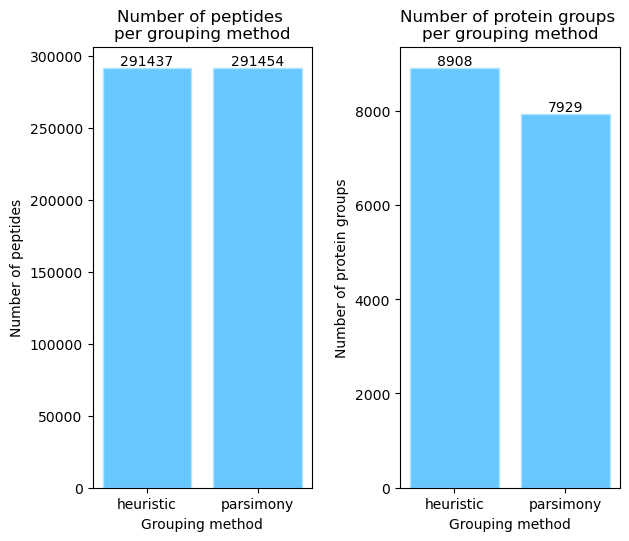

In [ ]:
# visualize comparison between heuristic and parsimony grouping
import matplotlib.pyplot as plt

def lighten_color(color, amount=0.5):
    """
    Lightens the given color by multiplying (1-luminosity) by the given amount.
    Input can be matplotlib color string, hex string, or RGB tuple.

    Parameters
    ----------
    color : str, tuple
        color to lighten

    amount : float, default 0.5
        amount to lighten the color

    Returns
    -------
    tuple
        lightened color
    """
    import colorsys

    import matplotlib.colors as mc

    try:
        c = mc.cnames[color]
    except KeyError:
        c = color
    c = colorsys.rgb_to_hls(*mc.to_rgb(c))
    return colorsys.hls_to_rgb(c[0], 1 - amount * (1 - c[1]), c[2])


def basic_barplot(
        values : list,
        names : list,
        title : str,
        xlabel : str,
        ylabel : str,
        color_hex : str,
        hwspace : float = 0.4,
):
    """rudimentary visualization function to plot barplot"""

    panels = len(values)
    fig, axs = plt.subplots(1, panels, figsize = (panels * 3, 5))
    plt.tight_layout()
    axs = axs.flatten()
    for i, ax in enumerate(axs):
        heights = [len(v) for v in values[i]]
        bars = ax.bar(names[i], heights, color = color_hex[i])
        for b in bars:
            b.set_edgecolor(lighten_color(b.get_facecolor(), 0.5))
            b.set_facecolor(color_hex[i])
            ax.text(b.get_x() + (b.get_width() / 2), b.get_height(), str(int(b.get_height())), ha = 'center', va = 'bottom')

        ax.set_title(title[i])
        ax.set_xlabel(xlabel[i])
        ax.set_ylabel(ylabel[i])

    plt.subplots_adjust(wspace = hwspace)

    return fig, axs

# Confirm that both methods have (nearly) the same number of precursors
pe_plot, _ = basic_barplot(
    [[data_tables["pe_heuristic"], data_tables["pe_parsimony"]], [data_tables["pg_heuristic"], data_tables["pg_parsimony"]]],
    [["heuristic", "parsimony"], ["heuristic", "parsimony"]],
    ["Number of peptides \nper grouping method", "Number of protein groups \nper grouping method"],
    ["Grouping method", "Grouping method"],
    ["Number of peptides", "Number of protein groups"],
    ["#67c8ff", "#67c8ff"],
)

# show plots next to each other in panel
layout = []


### Comparison of maximum_parsimony and heuristic grouping:

In [ ]:
data_tables["pg_parsimony"].shape

(7929, 4)